# Final Project (Capstone Project)

## The Financial Analyst Challenge: Analyze and advice on a Client´s portfolio

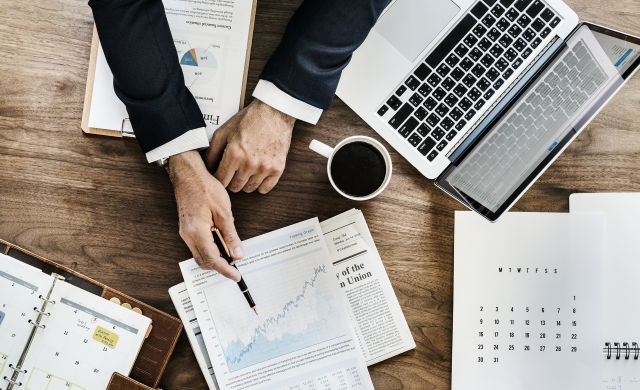

This the the financial analyst challenge from the Udemy course: 
__Manage Finance Data with Python & Pandas: Unique Masterclass__
This scenario is a real-world case in the life of a Financial Analyst/Advisor. It requires the ability to interpret and understand the underlying data and the client's requests and the ability to incorporate the client's inputs into our analysis. 
## The Case
I work as a Financial Analyst in an Asset Management Firm that manages the Portfolios of High Net Worth Individuals. I had a client, Yuna who retired after 30 years as an independent physician. Her husband died soon ad bequeathed a considerable investment portfolio to her. Till date, she has only been invested into __5 Healthcare Stocks__ that are most valuable in the US healthcare stocks in terms of __market capitalization__. Her strategy has been pretty simple: __Buying an equal number of shares of each Stock and reinvesting all dividends__ (assume no costs and taxes).

Now that she has retired with no active income, she decided to make her portfolio more suitable to the new situation. She agreed to sell parts of her five-Stocks Portfolio and invest into lower risk Government Bonds and high-quality corporate bonds. My goal is to diversify her stock portfolio that better reflects __Modern Portfolio Theory__.

---------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cufflinks as cf

plt.style.use("seaborn")
pd.options.display.float_format = '{:.3f}'.format

__Step 1: Identify the five stocks and get the respective Stock Tickers__! 

In [2]:
listings = pd.read_csv("listings_clean.csv", index_col = "Symbol")
listings

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.680,25934696179.920,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.150,5407809589.600,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.390,42781131315.300,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.160,53141086.800,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.020,15276869742.960,1969,Transportation,Air Freight/Delivery Services
...,...,...,...,...,...,...,...
ZUMZ,NASDAQ,Zumiez Inc.,26.720,681919062.560,2005,Consumer Services,Clothing/Shoe/Accessory Stores
ZUO,NYSE,"Zuora, Inc.",19.790,2147266454.000,2018,Technology,Computer Software: Prepackaged Software
ZYME,NYSE,Zymeworks Inc.,15.740,504078206.260,2017,Health Care,Major Pharmaceuticals


In [3]:
listings['Sector'].unique()

array(['Capital Goods', 'Basic Industries', 'Technology', 'Health Care',
       'Transportation', 'Finance', 'Consumer Services', nan,
       'Consumer Durables', 'Consumer Non-Durables', 'Miscellaneous',
       'Public Utilities', 'Energy'], dtype=object)

In [4]:
health = listings.loc[listings.Sector == "Health Care"].copy()
health

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
AAC,NYSE,"AAC Holdings, Inc.",2.160,53141086.800,2014,Health Care,Medical Specialities
ABBV,NYSE,AbbVie Inc.,82.950,122613763441.050,2012,Health Care,Major Pharmaceuticals
ABC,NYSE,AmerisourceBergen Corporation (Holding Co),74.000,15620652082.000,1969,Health Care,Other Pharmaceuticals
ABEO,NASDAQ,Abeona Therapeutics Inc.,7.540,361540692.760,1969,Health Care,Major Pharmaceuticals
ABEOW,NASDAQ,Abeona Therapeutics Inc.,3.070,NaN,1969,Health Care,Major Pharmaceuticals
...,...,...,...,...,...,...,...
ZSAN,NASDAQ,Zosano Pharma Corporation,3.710,44419974.690,2015,Health Care,Major Pharmaceuticals
ZTS,NYSE,Zoetis Inc.,101.330,48552001684.810,2013,Health Care,Major Pharmaceuticals
ZYME,NYSE,Zymeworks Inc.,15.740,504078206.260,2017,Health Care,Major Pharmaceuticals


In [5]:
large_cap_health = health.nlargest(n = 5, columns = "Market_Cap")
large_cap_health

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
JNJ,NYSE,Johnson & Johnson,135.580,361018644165.180,1969,Health Care,Major Pharmaceuticals
PFE,NYSE,"Pfizer, Inc.",42.730,237228618676.700,1969,Health Care,Major Pharmaceuticals
UNH,NYSE,UnitedHealth Group Incorporated,246.030,236075260845.450,1969,Health Care,Medical Specialities
MRK,NYSE,"Merck & Company, Inc.",80.820,208764129420.360,1969,Health Care,Major Pharmaceuticals
NVS,NYSE,Novartis AG,81.930,189354275177.970,1969,Health Care,Major Pharmaceuticals


In [6]:
ticker = large_cap_health.index.to_list()
ticker

['JNJ', 'PFE', 'UNH', 'MRK', 'NVS']

----------------------------------

__Step 2: Create an appropriate Index from 1997 (hint: start with 1996-12-31) until the end of 2018 that best reflects her strategy and create a normalized Price Chart (with Base Value 100 on 1996-12-31)!__

In [7]:
stocks = yf.download(ticker, start = "1997-01-01", end = "2018-12-31")[['Adj Close', 'Close']]
stocks

[*********************100%***********************]  5 of 5 completed


Adj Close                                Close                \
                 JNJ    MRK    NVS    PFE     UNH     JNJ    MRK    NVS   
Date                                                                      
1996-12-31    13.489 15.835 13.068  5.942   4.647  24.875 37.989 25.762   
1997-01-02    13.489 15.885 12.983  5.862   4.673  24.875 38.108 25.594   
1997-01-03    13.625 16.432 12.897  5.987   4.802  25.125 39.420 25.426   
1997-01-06    13.727 16.481 12.869  5.960   4.815  25.312 39.540 25.370   
1997-01-07    13.760 16.506 12.897  6.050   4.828  25.375 39.599 25.426   
...              ...    ...    ...    ...     ...     ...    ...    ...   
2018-12-21   116.795 62.774 64.421 34.912 226.714 128.090 69.561 74.686   
2018-12-24   112.008 61.267 63.757 33.763 221.577 122.840 67.891 73.916   
2018-12-26   115.536 63.721 65.519 35.129 231.479 126.710 70.611 75.959   
2018-12-27   116.175 64.910 64.978 35.678 233.971 127.410 71.927 75.332   
2018-12-28   116.047 64.901 65.898 35.770 234.228 127.270 71.918 76.398   

                           
              PFE     UNH  
Date                       
1996-12-31 13.125   5.625  
1997-01-02 12.947   5.656  
1997-01-03 13.223   5.812  
1997-01-06 13.164   5.828  
1997-01-07 13.362   5.844  
...           ...     ...  
2018-12-21 39.782 238.340  
2018-12-24 38.472 232.940  
2018-12-26 40.028 243.350  
2018-12-27 40.655 245.970  
2018-12-28 40.759 246.240  

[5536 rows x 10 columns]

In [8]:
# Price-weighted Index (PWI)
weights = stocks.Close.div(stocks.Close.sum(axis = 1), axis = "index")
weights

,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1996-12-31,0.232,0.354,0.240,0.122,0.052
1997-01-02,0.232,0.356,0.239,0.121,0.053
1997-01-03,0.230,0.362,0.233,0.121,0.053
1997-01-06,0.232,0.362,0.232,0.121,0.053
1997-01-07,0.232,0.361,0.232,0.122,0.053
...,...,...,...,...,...
2018-12-21,0.233,0.126,0.136,0.072,0.433
2018-12-24,0.229,0.127,0.138,0.072,0.435
2018-12-26,0.228,0.127,0.136,0.072,0.437


In [9]:
# Daily returns
ret = stocks["Adj Close"].pct_change().dropna()
ret

,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1997-01-02,0.000,0.003,-0.007,-0.014,0.006
1997-01-03,0.010,0.034,-0.007,0.021,0.028
1997-01-06,0.007,0.003,-0.002,-0.004,0.003
1997-01-07,0.002,0.002,0.002,0.015,0.003
1997-01-08,0.007,-0.012,-0.002,0.000,-0.021
...,...,...,...,...,...
2018-12-21,-0.001,-0.008,-0.010,-0.000,-0.017
2018-12-24,-0.041,-0.024,-0.010,-0.033,-0.023
2018-12-26,0.032,0.040,0.028,0.040,0.045


In [10]:
# Multiply each stock's return with its weight
health_index = ret.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)
health_index

Date
1997-01-02    99.818
1997-01-03   101.520
1997-01-06   101.712
1997-01-07   102.077
1997-01-08   101.639
               ...  
2018-12-21   855.943
2018-12-24   833.552
2018-12-26   865.582
2018-12-27   872.791
2018-12-28   874.798
Length: 5535, dtype: float64

In [11]:
# Normalize with base value 100 on 1996-12-31
health_index[pd.to_datetime("1996-12-31")] = 100
health_index

Date
1997-01-02    99.818
1997-01-03   101.520
1997-01-06   101.712
1997-01-07   102.077
1997-01-08   101.639
               ...  
2018-12-24   833.552
2018-12-26   865.582
2018-12-27   872.791
2018-12-28   874.798
1996-12-31   100.000
Length: 5536, dtype: float64

In [12]:
health_index.sort_index(inplace = True)
health_index.name = "Health Care"
health_index

Date
1996-12-31   100.000
1997-01-02    99.818
1997-01-03   101.520
1997-01-06   101.712
1997-01-07   102.077
               ...  
2018-12-21   855.943
2018-12-24   833.552
2018-12-26   865.582
2018-12-27   872.791
2018-12-28   874.798
Name: Health Care, Length: 5536, dtype: float64

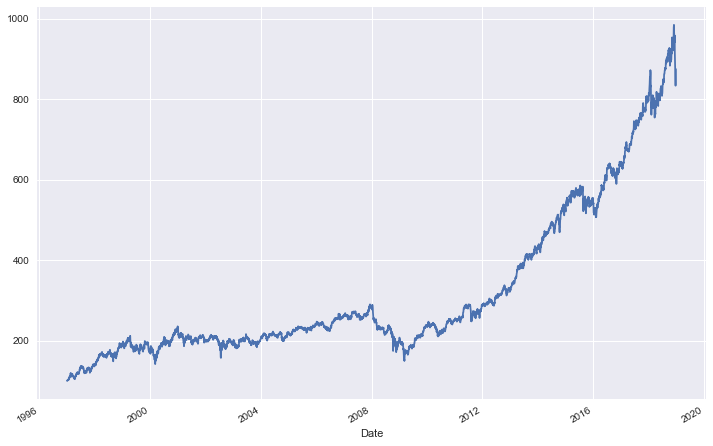

In [13]:
health_index.plot(figsize = (12, 8))
plt.show()

Yuna's initial investment increased eightfold in 22 years, it's pretty impressive!

---------------------------------

__Step 3: Verify the following statement that she made during the first meeting with your boss: "For investments periods of 6 years or longer, I never lost money with my portfolio!" Is Yuna right?__

In [14]:
# Find last price for each year
annual = health_index.resample("A", kind = "period").last().to_frame( ) 
annual.columns = ["Price"]
annual

,Price
Date,
1996,100.000
1997,141.073
1998,191.277
1999,173.802
2000,235.002
2001,201.144
2002,191.334
2003,207.188
2004,221.185


In [15]:
# Compute log returns
annual["Return"] = np.log(annual.Price / annual.Price.shift())
annual.dropna(inplace = True)
annual

,Price,Return
Date,,
1997,141.073,0.344
1998,191.277,0.304
1999,173.802,-0.096
2000,235.002,0.302
2001,201.144,-0.156
2002,191.334,-0.050
2003,207.188,0.080
2004,221.185,0.065
2005,238.609,0.076


In [16]:
years = annual.index.size
years

22

In [17]:
windows = [year for year in range(years, 0, -1)]
windows

[22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [18]:
for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()
triangle = annual.drop(columns = ["Price", "Return"])
annual

,Price,Return,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1997,141.073,0.344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344
1998,191.277,0.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324,0.304
1999,173.802,-0.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.184,0.104,-0.096
2000,235.002,0.302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.214,0.170,0.103,0.302
2001,201.144,-0.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.140,0.089,0.017,0.073,-0.156
2002,191.334,-0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.108,0.061,0.000,0.032,-0.103,-0.050
2003,207.188,0.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.104,0.064,0.016,0.044,-0.042,0.015,0.080
2004,221.185,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.099,0.064,0.024,0.048,-0.015,0.032,0.072,0.065
2005,238.609,0.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.097,0.066,0.032,0.053,0.003,0.043,0.074,0.071,0.076


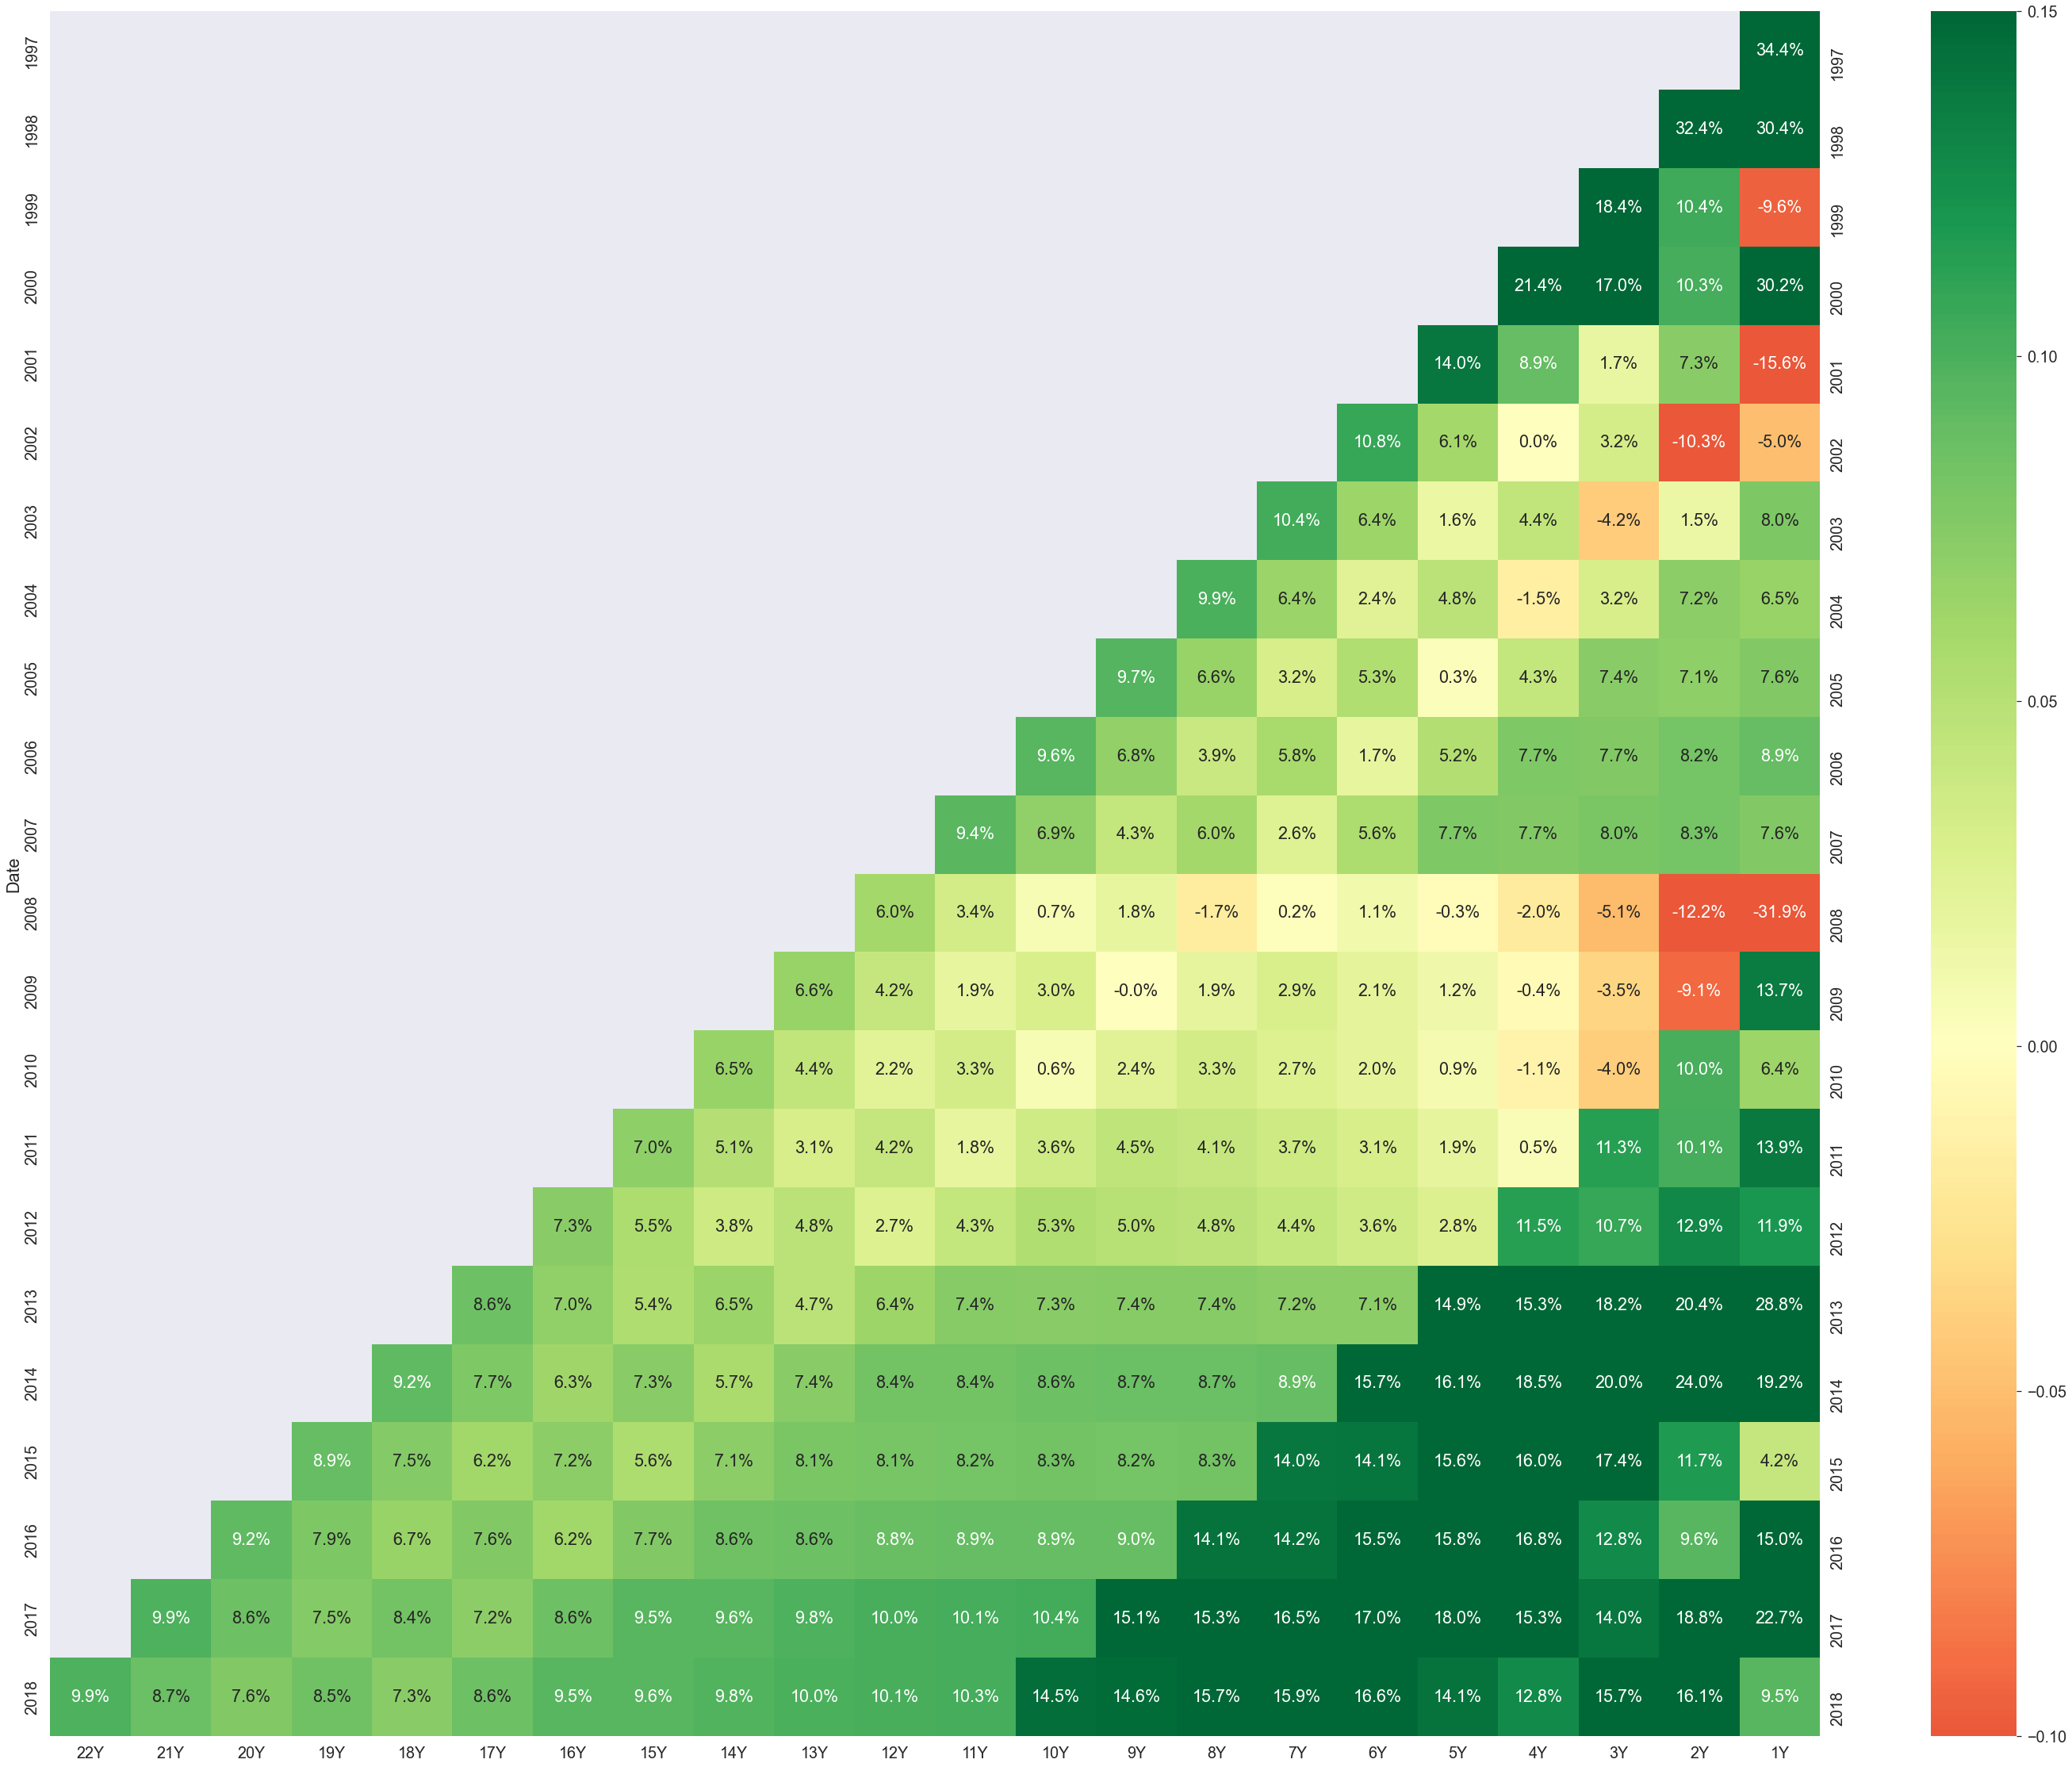

In [20]:
# Plot return triangle
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()

Yuna is false. Her portfolio lost value in the nine-year period from 2001 to 2009!

Once analyzed and educated Yuna on the past Performance of her Portfolio, my task is to compare her Portfolio with similar designed Portfolios/Indexes of other Sectors (five largest companies).  The appropriate indexes for for other sectors are already prepared (sector_indexes.csv). 

----------------------

__Step 4: Analyze and compare the performance of Yuna´s Large-Cap Health Care Portfolio with other sectors for the most recent 4-years period from 2015 until 2018. Provide Yuna with an interactive normalized Price Chart where she can play around__!

In [21]:
indexes = pd.read_csv("sector_indexes.csv", parse_dates = ["Date"], index_col = "Date")
indexes

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation
Date,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128.294,160.672,133.393,113.838,289.218,107.971,120.017,140.647,183.125,124.313
2018-12-24,124.953,155.393,126.147,111.800,282.379,104.768,117.474,135.757,181.658,120.440
2018-12-26,128.938,162.756,130.800,114.004,306.694,110.009,122.321,138.186,193.632,127.236


In [22]:
# Add healthcare into this new dataset
indexes["Health_Care"] = health_index
indexes

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,523.223
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,522.977
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,520.784
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,522.208
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,529.636
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128.294,160.672,133.393,113.838,289.218,107.971,120.017,140.647,183.125,124.313,855.943
2018-12-24,124.953,155.393,126.147,111.800,282.379,104.768,117.474,135.757,181.658,120.440,833.552
2018-12-26,128.938,162.756,130.800,114.004,306.694,110.009,122.321,138.186,193.632,127.236,865.582


In [23]:
# Normalize all records
indexes.Health_Care = indexes.Health_Care.div(indexes.Health_Care[0])
indexes

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,1.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,1.000
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,0.995
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,0.998
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,1.012
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128.294,160.672,133.393,113.838,289.218,107.971,120.017,140.647,183.125,124.313,1.636
2018-12-24,124.953,155.393,126.147,111.800,282.379,104.768,117.474,135.757,181.658,120.440,1.593
2018-12-26,128.938,162.756,130.800,114.004,306.694,110.009,122.321,138.186,193.632,127.236,1.654


In [24]:
import cufflinks as cf
cf.set_config_file(offline = True)
indexes.iplot()

----------------------------

__Step 5: Compare annualized risk and return based on daily (simple) returns and create an appropriate plot! Calculate the Sharpe Ratio and compare!__  

In [25]:
ret = indexes.pct_change().dropna()
ret

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.003,-0.024,0.003,-0.019,-0.049,-0.004,-0.025,-0.006,-0.033,-0.013,-0.010
2018-12-24,-0.026,-0.033,-0.054,-0.018,-0.024,-0.030,-0.021,-0.035,-0.008,-0.031,-0.026
2018-12-26,0.032,0.047,0.037,0.020,0.086,0.050,0.041,0.018,0.066,0.056,0.038


In [26]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [27]:
summary = ann_risk_return(ret)
summary

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


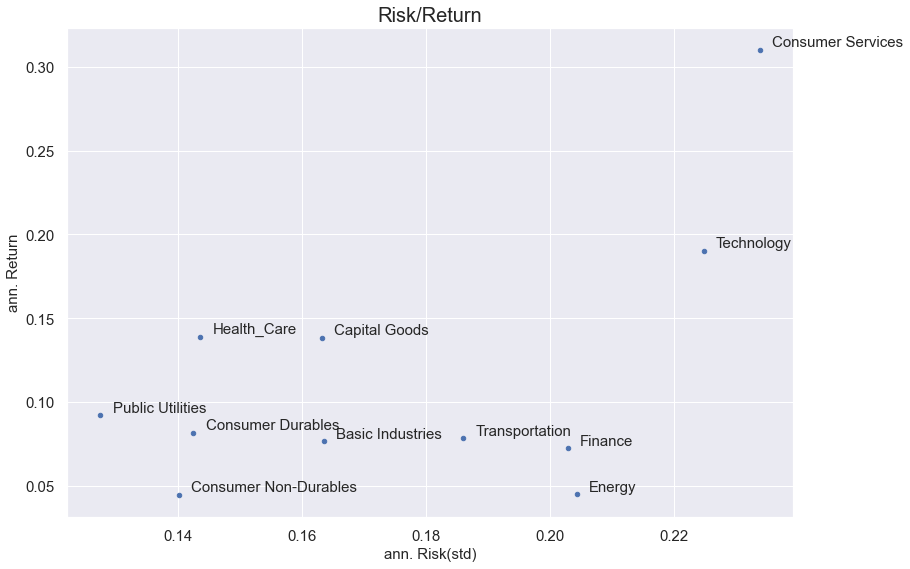

In [28]:
# Plot out sector's risk-return relationship
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13, 9), fontsize = 15)

for i in summary.index:
    plt.annotate(i, xy = (summary.loc[i, "Risk"] + 0.002, summary.loc[i, "Return"] + 0.002), size = 15)
    
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [29]:
# Compute Sharpe Ratio: measures the performance of an investment such as a security 
# or portfolio compared to a risk-free asset, after adjusting for its risk.
risk_free = [0.013, 0]
summary["Sharpe"] = (summary.Return - risk_free[0]) / summary.Risk
summary.sort_values("Sharpe", ascending = False, inplace = True)
summary

,Return,Risk,Sharpe
Consumer Services,0.310,0.234,1.271
Health_Care,0.139,0.144,0.879
Technology,0.190,0.225,0.789
Capital Goods,0.138,0.163,0.768
Public Utilities,0.092,0.127,0.621
Consumer Durables,0.082,0.142,0.483
Basic Industries,0.077,0.163,0.390
Transportation,0.079,0.186,0.353
Finance,0.073,0.203,0.294
Consumer Non-Durables,0.045,0.140,0.229


Sharpe ratios above 1.0 are generally considered “good," as this would suggest that the portfolio is offering excess returns relative to its volatility. A ratio of 1 is superb and difficult to achieve over long periods of time.<br>
The large-cap healthcare sector ranks 2nd in terms of Sharpe Ratio!<br>
Although consumer services ranks first, the risk is too high. There's no benefit in adding other sectors with lower Sharpe Ratio than healthcare into Yuna's portfolio as well.

----------------------------------

__Step 6:  Show Yuna that she could have improved the Sharpe Ratio of her Portfolio by adding other Sectors, without increasing the Total Risk of her Portfolio! Educate her on the Portfolio Diversification Effect!__

In [30]:
num_portfolios = 50000
num_assets = len(ret.columns)
num_assets

11

In [31]:
len(np.random.random(num_portfolios * num_assets))

550000

In [32]:
# Generate a seed for randomization
np.random.seed(111)
# Generate certain number of random portfolios then reshape them accordingly
matrix = np.random.random(num_portfolios * num_assets).reshape(num_portfolios, num_assets)
matrix

array([[0.61217018, 0.16906975, 0.43605902, ..., 0.23868214, 0.33765619,
        0.99071246],
       [0.23772645, 0.08119266, 0.66960024, ..., 0.90077418, 0.79396256,
        0.84056965],
       [0.81520746, 0.99095485, 0.57727383, ..., 0.81722006, 0.69772773,
        0.5652854 ],
       ...,
       [0.69799076, 0.56245452, 0.53310837, ..., 0.5478445 , 0.68422447,
        0.3976788 ],
       [0.84992188, 0.57697227, 0.41961015, ..., 0.28252564, 0.53844458,
        0.36460952],
       [0.79130478, 0.07503975, 0.42706009, ..., 0.94834337, 0.06855945,
        0.56065247]])

In [33]:
# Change into proportions
weights = matrix / matrix.sum(axis = 1, keepdims = True)
weights

array([[0.13785123, 0.03807189, 0.09819373, ..., 0.05374751, 0.07603494,
        0.22309308],
       [0.04681619, 0.01598951, 0.13186639, ..., 0.17739217, 0.15635744,
        0.16553591],
       [0.12969312, 0.15765315, 0.09183974, ..., 0.13001331, 0.11100301,
        0.08993248],
       ...,
       [0.11569744, 0.09323125, 0.08836689, ..., 0.09080952, 0.11341557,
        0.06591838],
       [0.20231586, 0.13734279, 0.09988422, ..., 0.06725256, 0.12817164,
        0.08679184],
       [0.13898176, 0.0131797 , 0.07500721, ..., 0.16656342, 0.01204152,
        0.09847087]])

In [34]:
# Calculate each portfolio's return
port_ret = ret.dot(weights.T)
port_ret

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.003,-0.003,-0.003,-0.001,-0.002,-0.002,-0.002,-0.001,-0.000,-0.002,...,-0.001,-0.001,-0.003,-0.003,-0.001,-0.002,-0.000,-0.002,-0.002,-0.003
2015-01-05,-0.014,-0.018,-0.017,-0.018,-0.020,-0.023,-0.019,-0.019,-0.022,-0.021,...,-0.020,-0.018,-0.016,-0.018,-0.018,-0.021,-0.018,-0.020,-0.018,-0.019
2015-01-06,-0.003,-0.008,-0.009,-0.008,-0.006,-0.010,-0.006,-0.011,-0.012,-0.010,...,-0.010,-0.006,-0.008,-0.006,-0.008,-0.008,-0.011,-0.011,-0.007,-0.006
2015-01-07,0.012,0.009,0.011,0.012,0.011,0.009,0.011,0.011,0.009,0.009,...,0.009,0.011,0.010,0.012,0.012,0.009,0.008,0.010,0.010,0.009
2015-01-08,0.018,0.018,0.017,0.018,0.015,0.020,0.017,0.019,0.017,0.016,...,0.016,0.018,0.017,0.016,0.019,0.016,0.015,0.017,0.017,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.013,-0.016,-0.018,-0.019,-0.019,-0.015,-0.014,-0.016,-0.016,-0.020,...,-0.017,-0.014,-0.021,-0.024,-0.015,-0.015,-0.016,-0.019,-0.013,-0.017
2018-12-24,-0.028,-0.027,-0.027,-0.026,-0.026,-0.029,-0.028,-0.030,-0.030,-0.024,...,-0.029,-0.030,-0.022,-0.024,-0.031,-0.028,-0.027,-0.027,-0.029,-0.025
2018-12-26,0.039,0.047,0.045,0.045,0.044,0.050,0.043,0.048,0.048,0.052,...,0.048,0.046,0.045,0.050,0.045,0.046,0.043,0.049,0.041,0.046


In [35]:
# Annualize the daily risks and returns for each portfolio
port_summary = ann_risk_return(port_ret)
port_summary

,Return,Risk
0,0.110,0.122
1,0.115,0.133
2,0.119,0.133
3,0.121,0.133
4,0.119,0.132
...,...,...
49995,0.114,0.134
49996,0.116,0.132
49997,0.126,0.139
49998,0.099,0.130


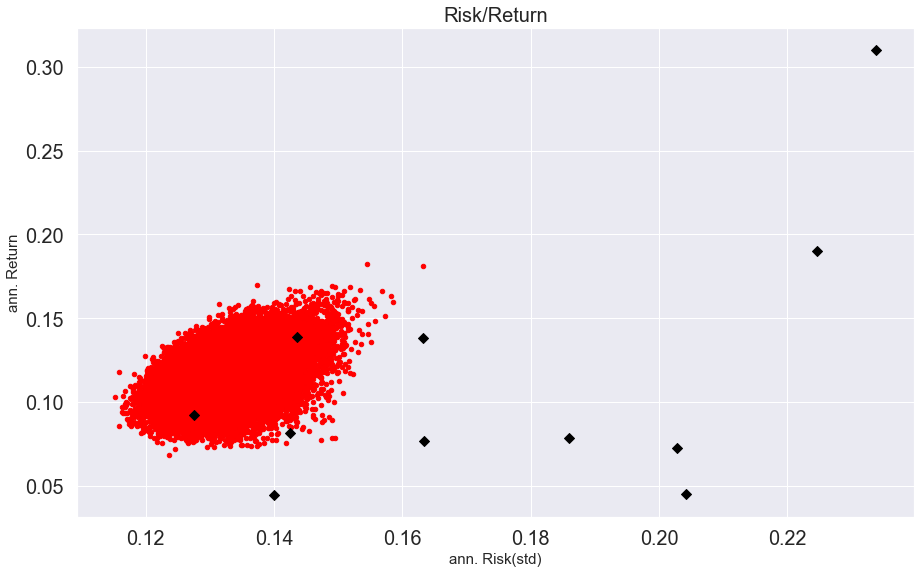

In [36]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")

# Plot each sectors
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [37]:
port_summary["Sharpe"] = (port_summary.Return - risk_free[0]) / port_summary.Risk
port_summary

,Return,Risk,Sharpe
0,0.110,0.122,0.798
1,0.115,0.133,0.769
2,0.119,0.133,0.794
3,0.121,0.133,0.811
4,0.119,0.132,0.800
...,...,...,...
49995,0.114,0.134,0.757
49996,0.116,0.132,0.777
49997,0.126,0.139,0.815
49998,0.099,0.130,0.663


In [38]:
port_summary.describe()

,Return,Risk,Sharpe
count,50000.000,50000.000,50000.000
mean,0.115,0.132,0.774
std,0.014,0.005,0.092
min,0.068,0.115,0.440
25%,0.106,0.129,0.710
50%,0.115,0.132,0.777
75%,0.125,0.136,0.840
max,0.182,0.163,1.142


In [39]:
# Find the ID of the portfolio with highest Sharpe ratio
msrp = port_summary.Sharpe.idxmax()
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.170
Risk     0.137
Sharpe   1.142
Name: 46957, dtype: float64

In [40]:
# Find the weights of stock constituents in the best performing portfolio
msrp_w = weights[msrp, :]
pd.Series(index = indexes.columns, data = msrp_w)

Basic Industries        0.130
Capital Goods           0.044
Consumer Durables       0.092
Consumer Non-Durables   0.005
Consumer Services       0.286
Energy                  0.004
Finance                 0.010
Public Utilities        0.105
Technology              0.055
Transportation          0.018
Health_Care             0.250
dtype: float64

----------------------------------

Next, I added those sectors to Yuna's stock portfolio that showed:
- __positive Alpha__ over the most recent 4-Year Period
- __Beta-Factor below 1__ as Yuna fears a market crisis in the near future

__Step 7: Identify Sectors with positive Alpha and a Beta-Factor < 1. Which Sectors will be added to Yuna´s Portfolio?__

We will evaluate the following metrics:
- Annualized Risk and Return (daily simple Returns)
- Sharpe Ratio
- Annualized Total Risk in Variance units
- Systematic Risk
- Unsystematic Risk
- Beta
- CAPM Return
- Alpha

In [41]:
# Import S&P500 dataset
SP500 = pd.read_csv("SP500_TR.csv", parse_dates = ["Date"], index_col = "Date")["Close"]
SP500

Date
1988-12-30    288.120
1989-01-03    285.650
1989-01-04    289.990
1989-01-05    290.610
1989-01-06    291.290
               ...   
2018-12-21   4802.510
2018-12-24   4672.660
2018-12-26   4904.490
2018-12-27   4946.940
2018-12-28   4941.610
Name: Close, Length: 7559, dtype: float64

In [42]:
# adjust the new dataset's index according to the major dataset
SP500 = SP500.reindex(indexes.index)
SP500

Date
2014-12-31   3769.440
2015-01-02   3768.680
2015-01-05   3700.030
2015-01-06   3667.140
2015-01-07   3710.940
               ...   
2018-12-21   4802.510
2018-12-24   4672.660
2018-12-26   4904.490
2018-12-27   4946.940
2018-12-28   4941.610
Name: Close, Length: 1006, dtype: float64

In [43]:
# Compute the return of S&P500 and add to the major return dataset
ret_SP = SP500.pct_change().dropna()
ret["SP500"] = ret_SP
ret

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care,SP500
Date,,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004,-0.018
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003,-0.009
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014,0.012
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.003,-0.024,0.003,-0.019,-0.049,-0.004,-0.025,-0.006,-0.033,-0.013,-0.010,-0.021
2018-12-24,-0.026,-0.033,-0.054,-0.018,-0.024,-0.030,-0.021,-0.035,-0.008,-0.031,-0.026,-0.027
2018-12-26,0.032,0.047,0.037,0.020,0.086,0.050,0.041,0.018,0.066,0.056,0.038,0.050


In [44]:
summary = ann_risk_return(ret)
summary

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


In [45]:
summary["Sharpe"] = (summary["Return"].sub(risk_free[0]))/summary["Risk"]
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
Basic Industries,0.077,0.163,0.390,0.027
Capital Goods,0.138,0.163,0.768,0.027
Consumer Durables,0.082,0.142,0.483,0.020
Consumer Non-Durables,0.045,0.140,0.229,0.020
Consumer Services,0.310,0.234,1.271,0.055
Energy,0.045,0.204,0.158,0.042
Finance,0.073,0.203,0.294,0.041
Public Utilities,0.092,0.127,0.621,0.016
Technology,0.190,0.225,0.789,0.050
Transportation,0.079,0.186,0.353,0.035


In [46]:
COV = ret.cov()*252
COV

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care,SP500
Basic Industries,0.027,0.017,0.014,0.014,0.016,0.024,0.019,0.010,0.016,0.017,0.013,0.016
Capital Goods,0.017,0.027,0.014,0.012,0.022,0.020,0.023,0.009,0.022,0.021,0.017,0.019
Consumer Durables,0.014,0.014,0.020,0.013,0.013,0.013,0.012,0.011,0.012,0.014,0.012,0.013
Consumer Non-Durables,0.014,0.012,0.013,0.020,0.012,0.012,0.010,0.011,0.012,0.011,0.011,0.012
Consumer Services,0.016,0.022,0.013,0.012,0.055,0.019,0.021,0.009,0.038,0.020,0.017,0.022
Energy,0.024,0.020,0.013,0.012,0.019,0.042,0.025,0.010,0.018,0.023,0.015,0.020
Finance,0.019,0.023,0.012,0.010,0.021,0.025,0.041,0.006,0.021,0.024,0.017,0.022
Public Utilities,0.010,0.009,0.011,0.011,0.009,0.010,0.006,0.016,0.008,0.008,0.009,0.009
Technology,0.016,0.022,0.012,0.012,0.038,0.018,0.021,0.008,0.050,0.018,0.017,0.022
Transportation,0.017,0.021,0.014,0.011,0.020,0.023,0.024,0.008,0.018,0.035,0.015,0.019


In [47]:
# Add variance of each sectors
summary["SystRisk_var"] = COV.iloc[:, -1]
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032
Energy,0.045,0.204,0.158,0.042,0.020,0.022
Finance,0.073,0.203,0.294,0.041,0.022,0.019
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007
Technology,0.190,0.225,0.789,0.050,0.022,0.029
Transportation,0.079,0.186,0.353,0.035,0.019,0.016


In [48]:
# Beta: measures a stock’s volatility in relation with the overall market. If < 1, less volatile. 
summary["beta"] = summary.SystRisk_var / summary.loc["SP500", "SystRisk_var"]

summary["capm_ret"] = risk_free[0] + (summary.loc["SP500", "Return"] - risk_free[0])*summary.beta

# Alpha is the excess return of an investment after adjusting for market-related volatility and random fluctuations.
summary["alpha"] = summary.Return - summary.capm_ret
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007,1.042,0.080,0.058
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008,0.623,0.053,-0.008
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032,1.205,0.090,0.220
Energy,0.045,0.204,0.158,0.042,0.020,0.022,1.052,0.081,-0.035
Finance,0.073,0.203,0.294,0.041,0.022,0.019,1.164,0.088,-0.015
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Technology,0.190,0.225,0.789,0.050,0.022,0.029,1.177,0.089,0.102
Transportation,0.079,0.186,0.353,0.035,0.019,0.016,1.020,0.079,0.000


In [49]:
summary.loc[(summary.alpha > 0) & (summary.beta < 1)]

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Health_Care,0.139,0.144,0.879,0.021,0.016,0.005,0.835,0.067,0.073


After advanced evaluation, I suggest Yuna to add the following sectors to her stock portfolio:
- Basic Industries
- Consumer Durables
- Public Utilities 